In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



In [68]:
# Load the dataset
df = pd.read_csv('D:/New folder/Most Streamed Spotify Songs 2024.csv')


In [69]:

# Display the first few rows of the dataframe
print(df.head())




                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

In [70]:

# Display the info of the dataframe
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [71]:
# Check for missing values
print(df.isnull().sum())



Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [72]:
# Drop columns with too many null values
df.drop(columns=['Soundcloud Streams', 'TIDAL Popularity'], axis=1, inplace=True)



In [73]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)



In [74]:
# Clean and convert 'All Time Rank' column to integer
df['All Time Rank'] = df['All Time Rank'].str.replace(',', '').astype(int)



In [75]:
# Convert 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])


In [76]:

# Clean and convert specified columns to float
columns = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Shazam Counts']
for column in columns:
    df[column] = df[column].str.replace(',', '').astype(float)



In [77]:
# Fill missing values in 'Artist' column with the mode
df['Artist'].fillna(df['Artist'].mode()[0], inplace=True)



In [78]:

# Fill missing values in numeric columns with the median
for col in df.columns[7:26]:
    df[col].fillna(df[col].median(), inplace=True)

In [79]:

# Create a new classification column 'Popularity Class'
# Assuming a threshold of 1,000,000 streams to classify as 'Popular' or 'Not Popular'
df['Popularity Class'] = np.where(df['Spotify Streams'] >= 1000000, 'Popular', 'Not Popular')

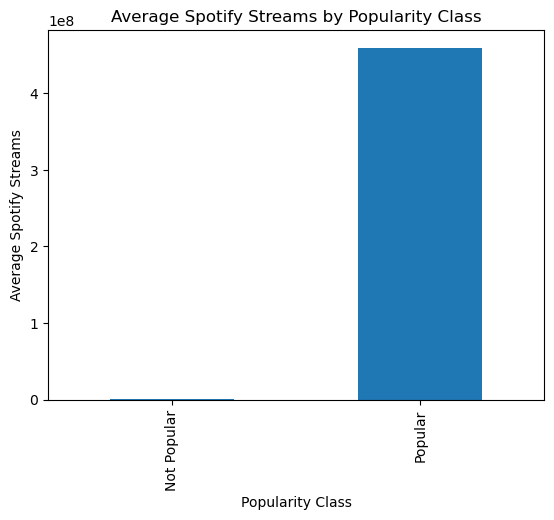

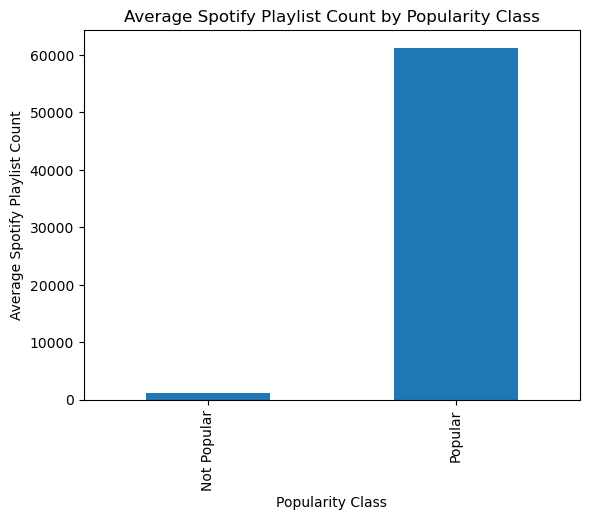

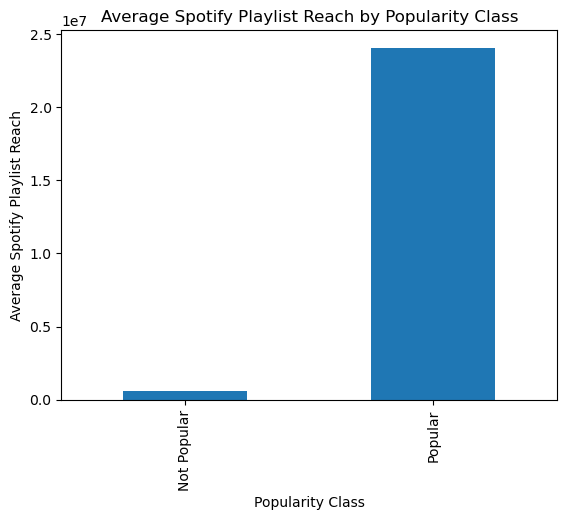

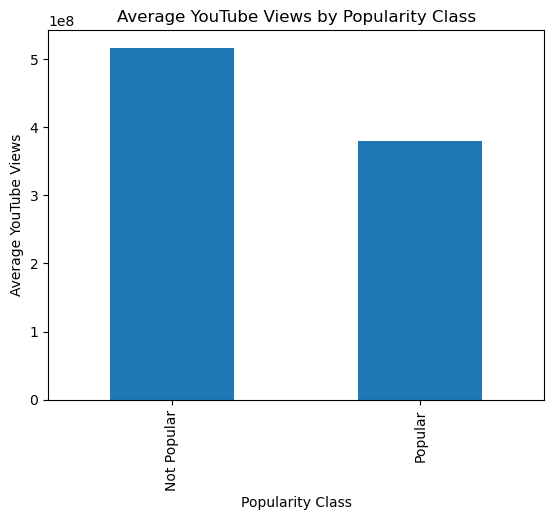

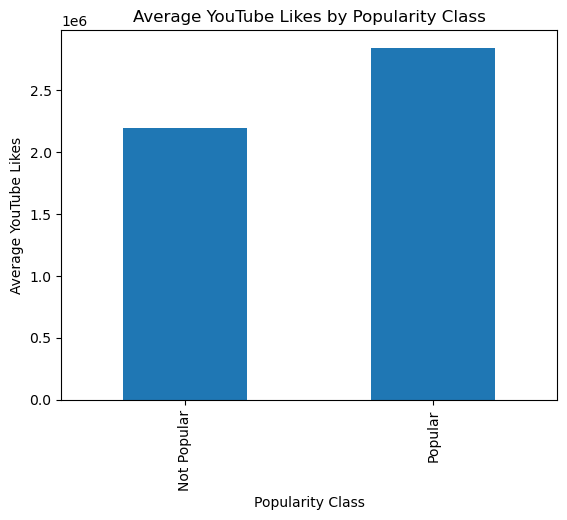

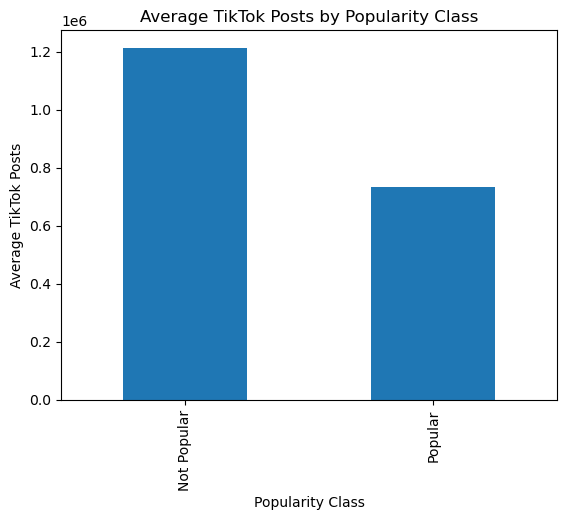

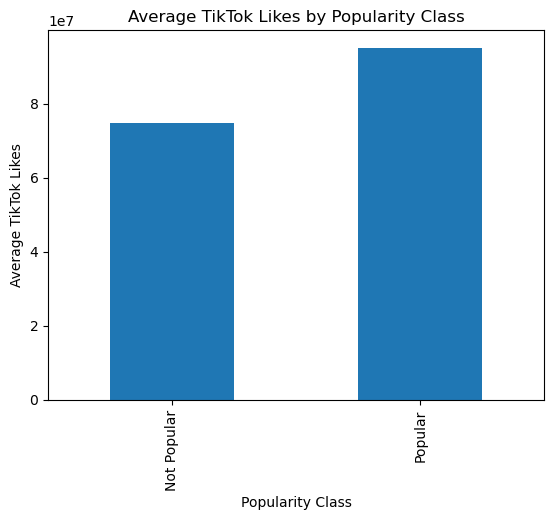

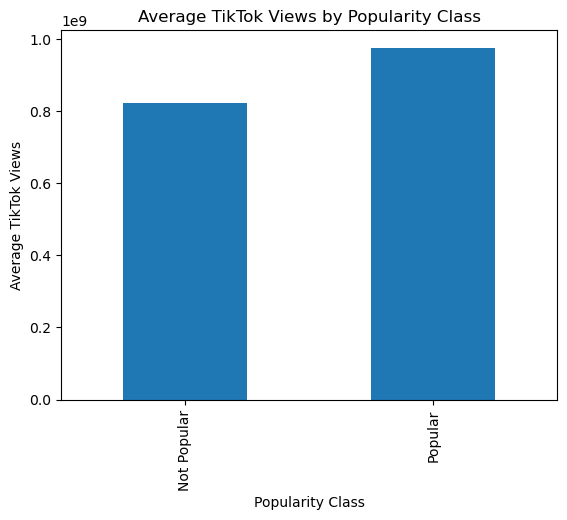

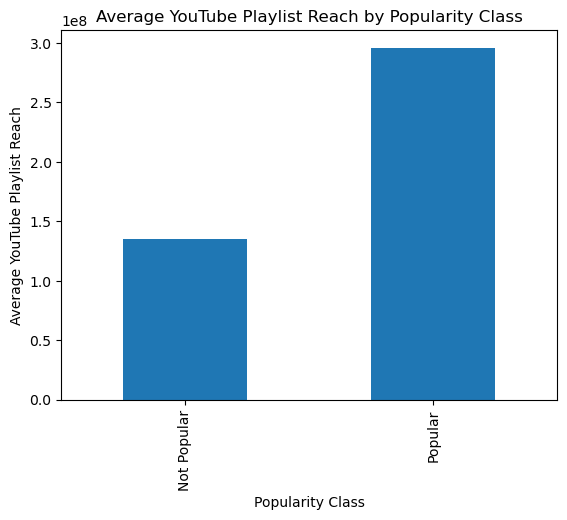

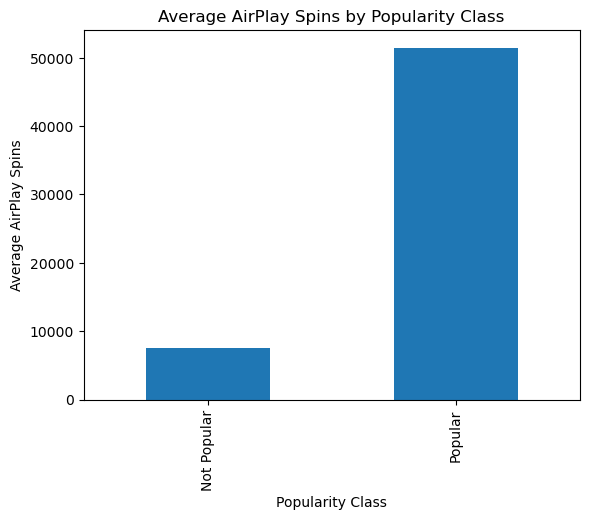

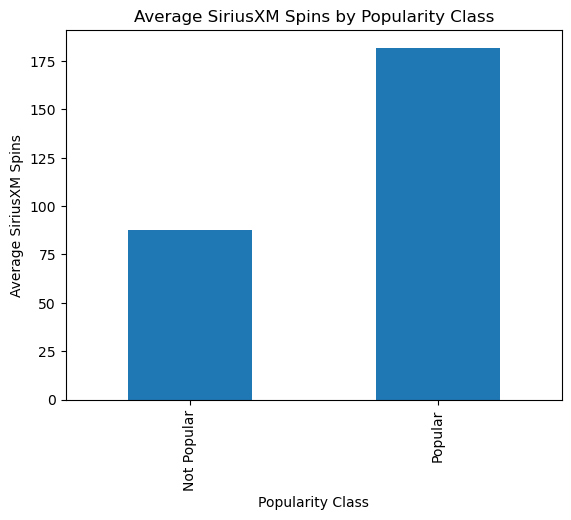

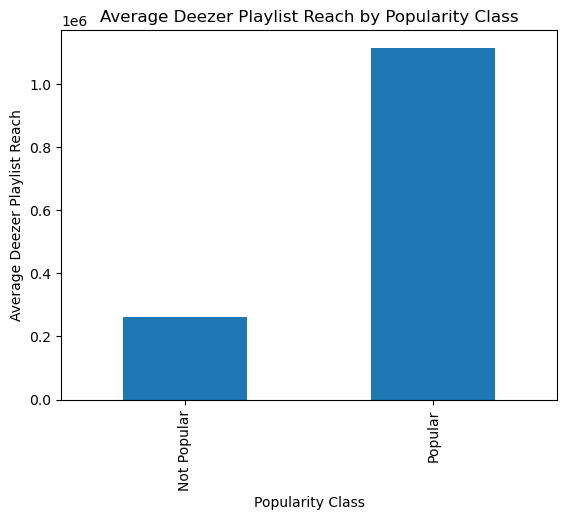

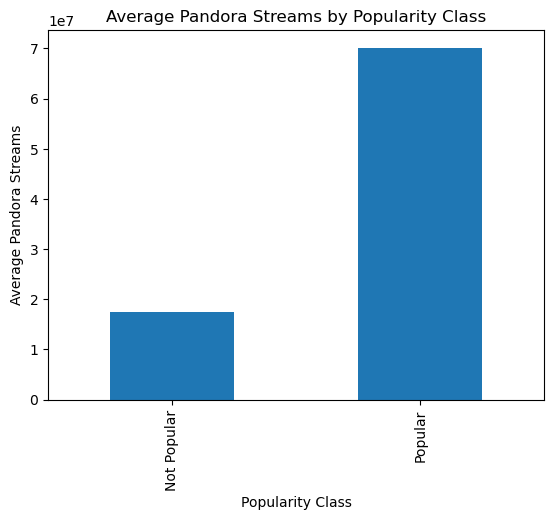

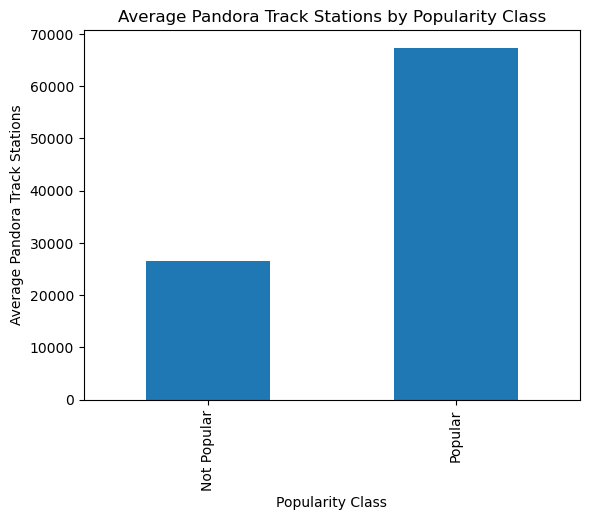

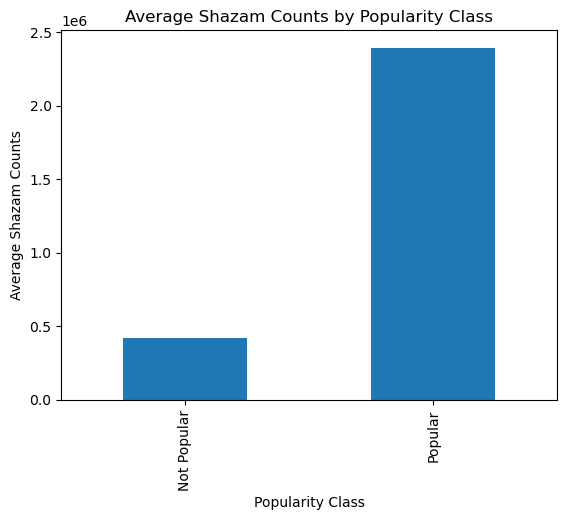

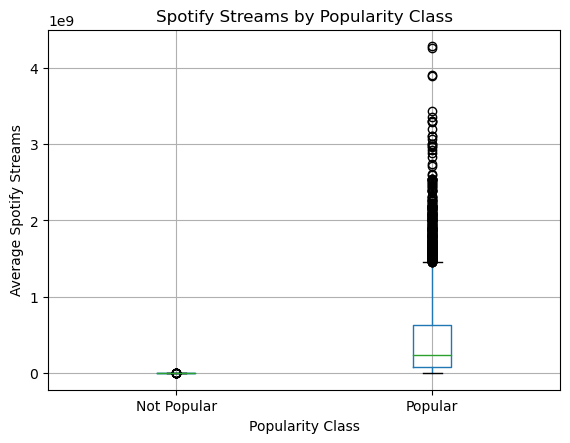

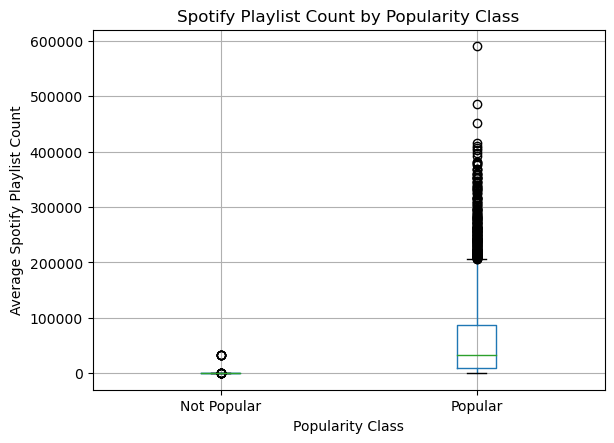

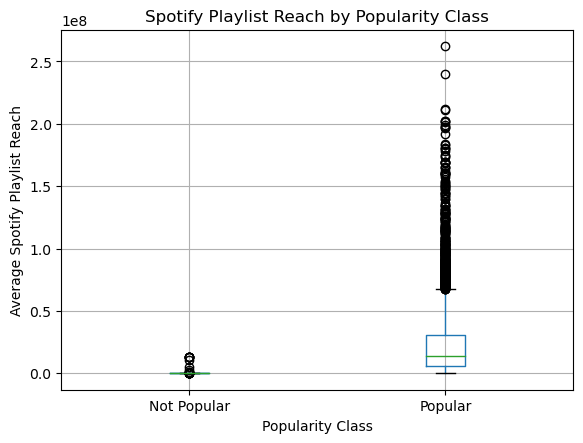

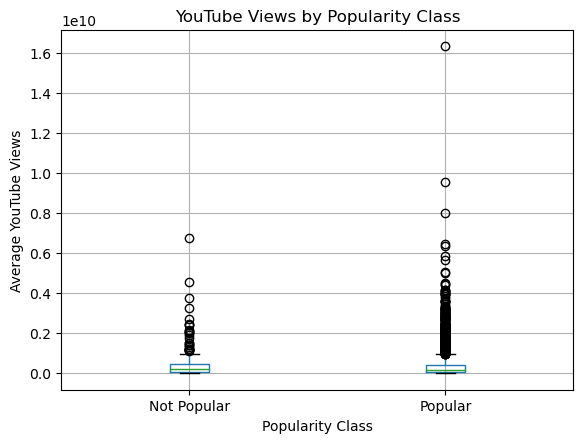

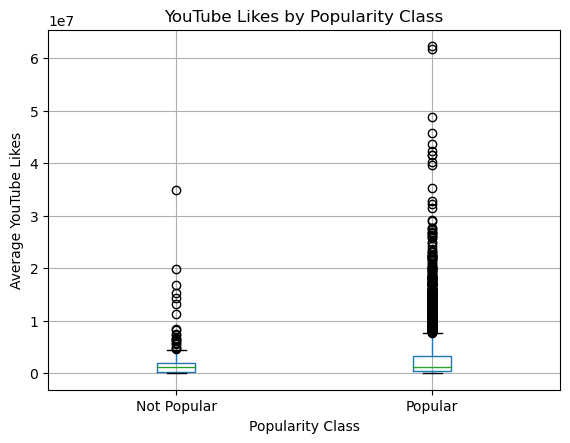

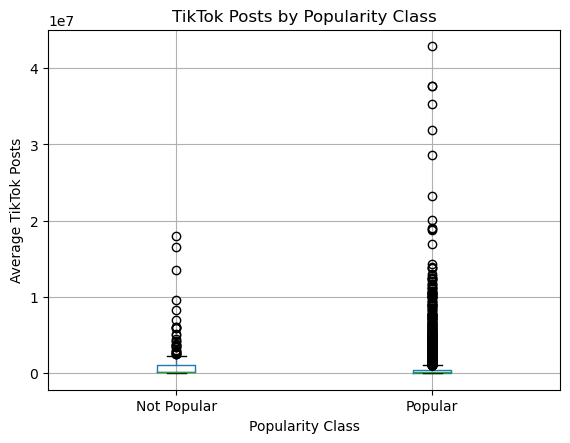

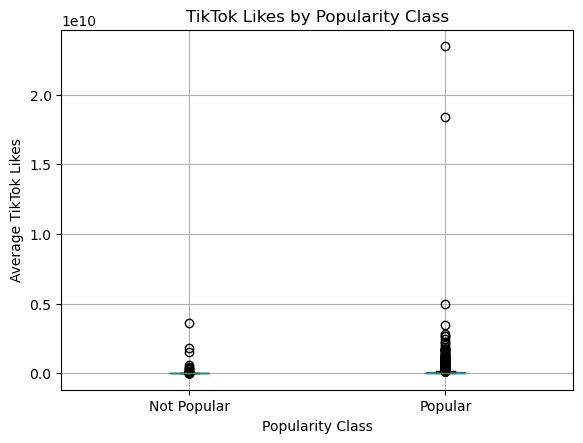

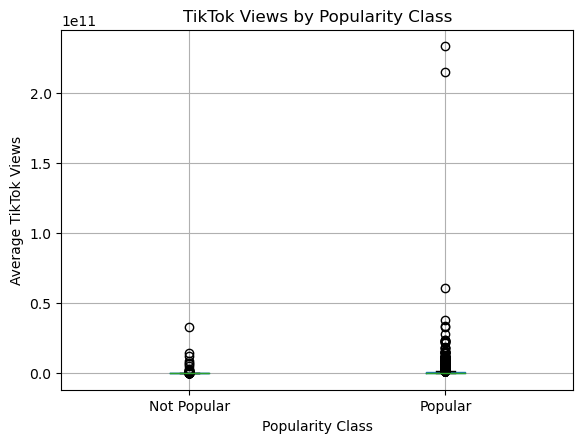

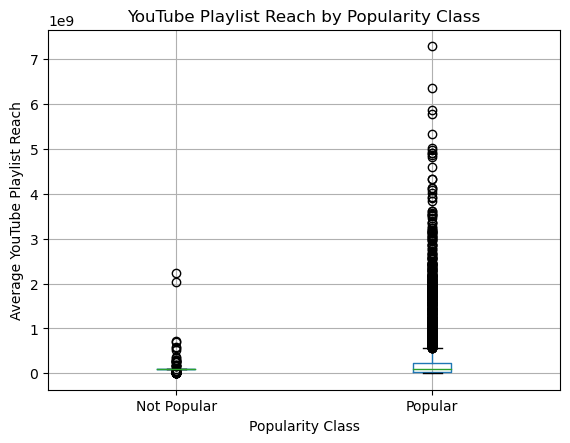

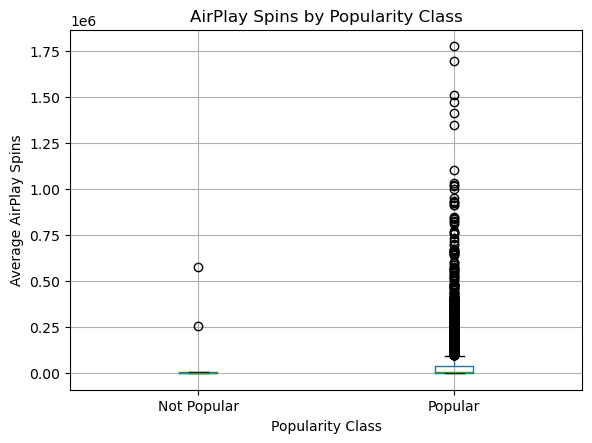

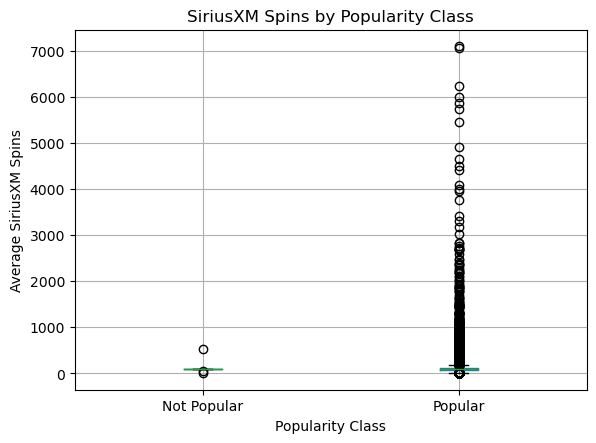

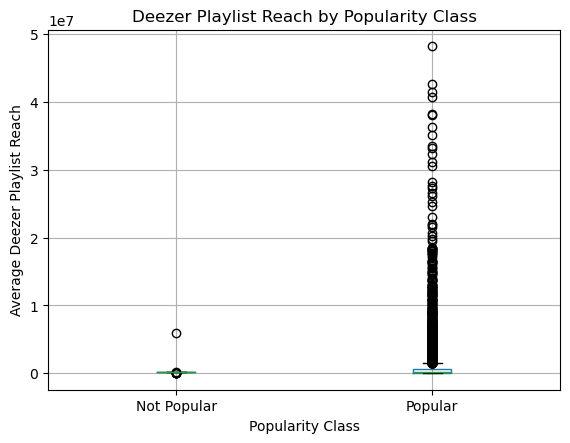

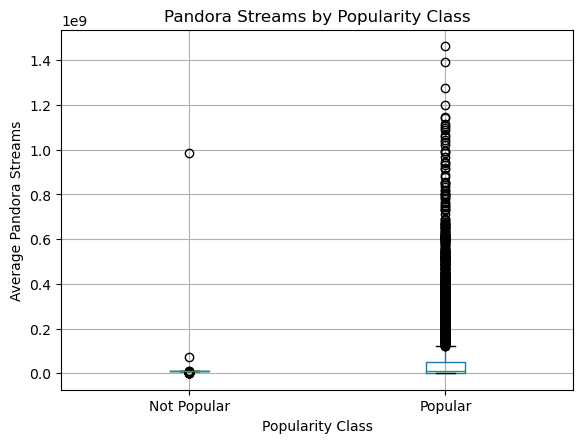

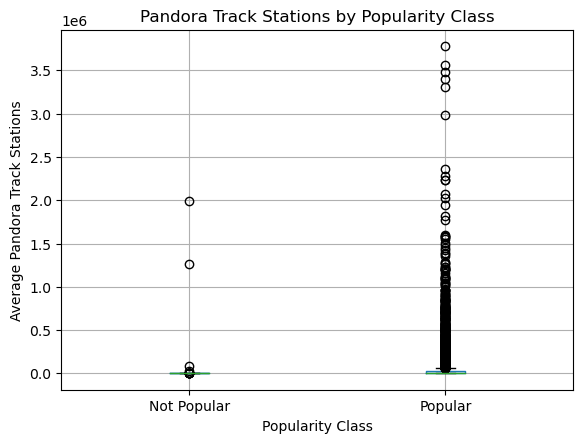

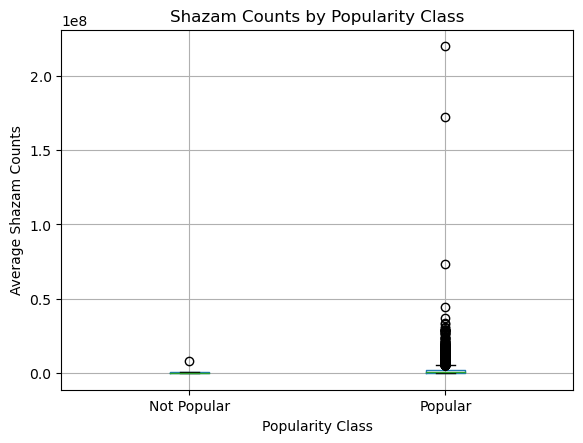

In [80]:



# Define a function to plot and show the relationship
def plot_relation(feature, ylabel, kind='bar'):
    if kind == 'bar':
        df.groupby('Popularity Class')[feature].mean().plot(kind=kind, title=f'Average {ylabel} by Popularity Class')
    elif kind == 'box':
        df.boxplot(column=feature, by='Popularity Class')
        plt.title(f'{ylabel} by Popularity Class')
        plt.suptitle('')  # Suppress the default title
    plt.ylabel(f'Average {ylabel}')
    plt.show()

# Plot relations
relations = {
    'Spotify Streams': 'Spotify Streams',
    'Spotify Playlist Count': 'Spotify Playlist Count',
    'Spotify Playlist Reach': 'Spotify Playlist Reach',
    'YouTube Views': 'YouTube Views',
    'YouTube Likes': 'YouTube Likes',
    'TikTok Posts': 'TikTok Posts',
    'TikTok Likes': 'TikTok Likes',
    'TikTok Views': 'TikTok Views',
    'YouTube Playlist Reach': 'YouTube Playlist Reach',
    'AirPlay Spins': 'AirPlay Spins',
    'SiriusXM Spins': 'SiriusXM Spins',
    'Deezer Playlist Reach': 'Deezer Playlist Reach',
    'Pandora Streams': 'Pandora Streams',
    'Pandora Track Stations': 'Pandora Track Stations',
    'Shazam Counts': 'Shazam Counts'
}

for feature, ylabel in relations.items():
    plot_relation(feature, ylabel)

# Additional plots for diversity (using box plots)
for feature, ylabel in relations.items():
    plot_relation(feature, ylabel, kind='box')


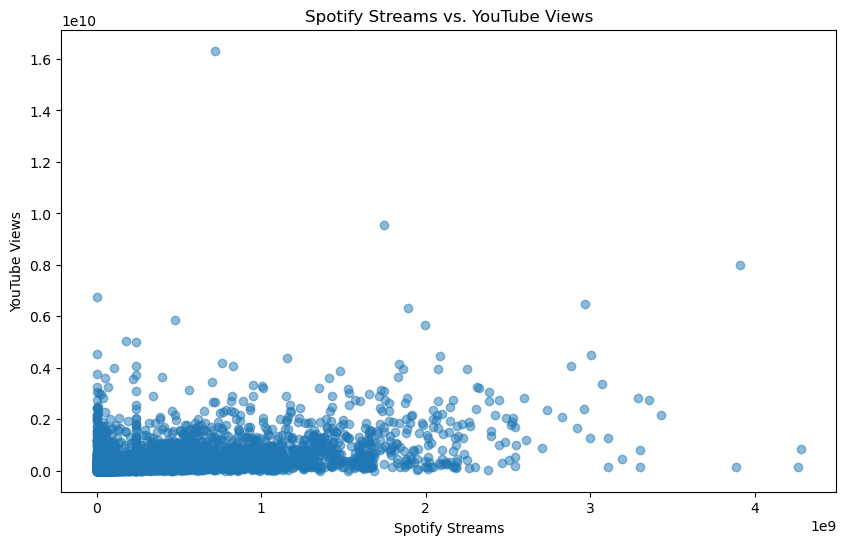

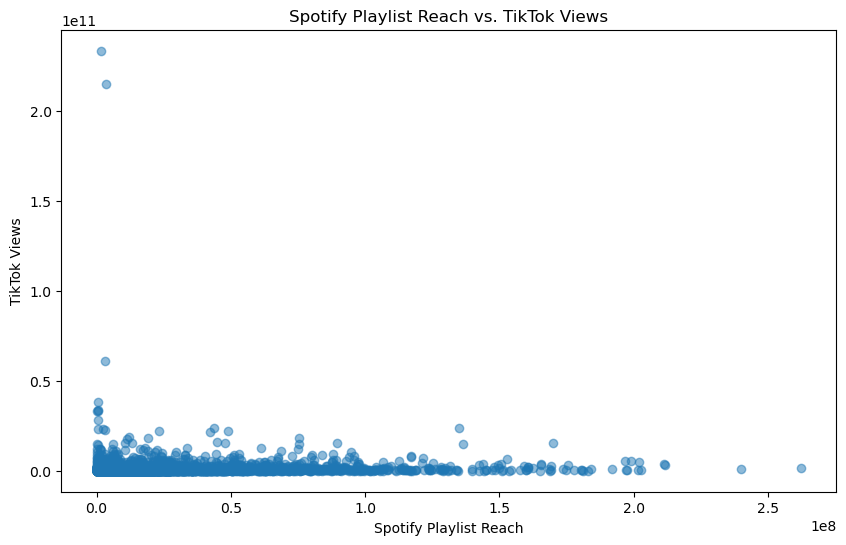

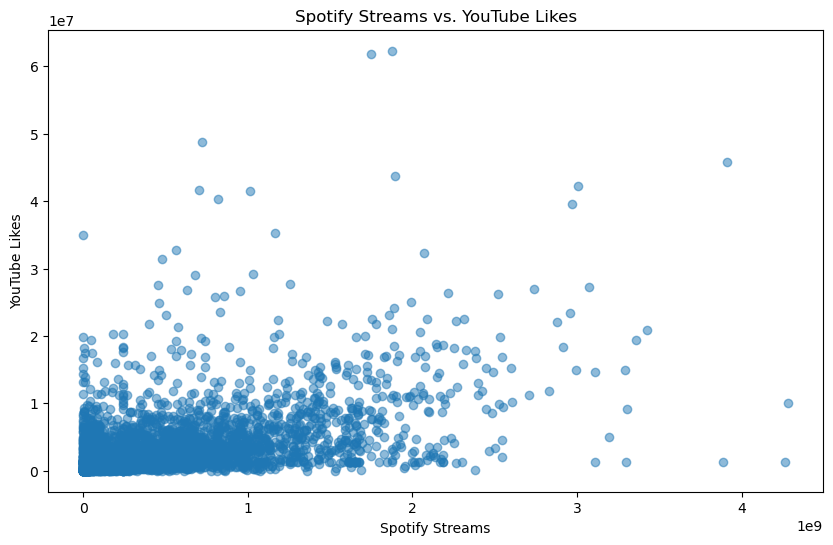

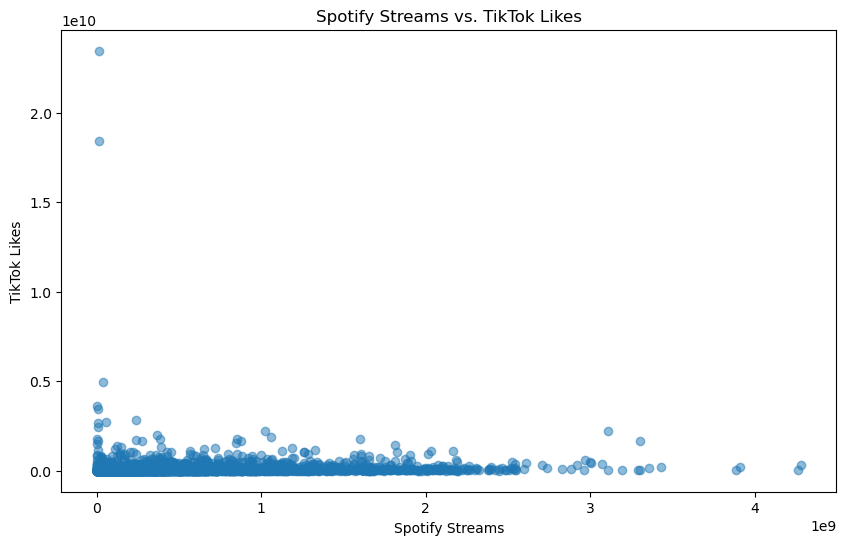

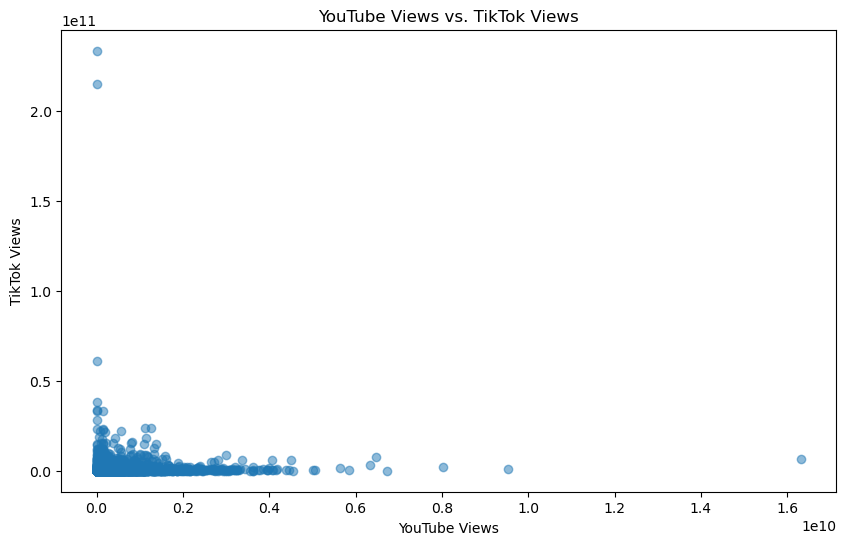

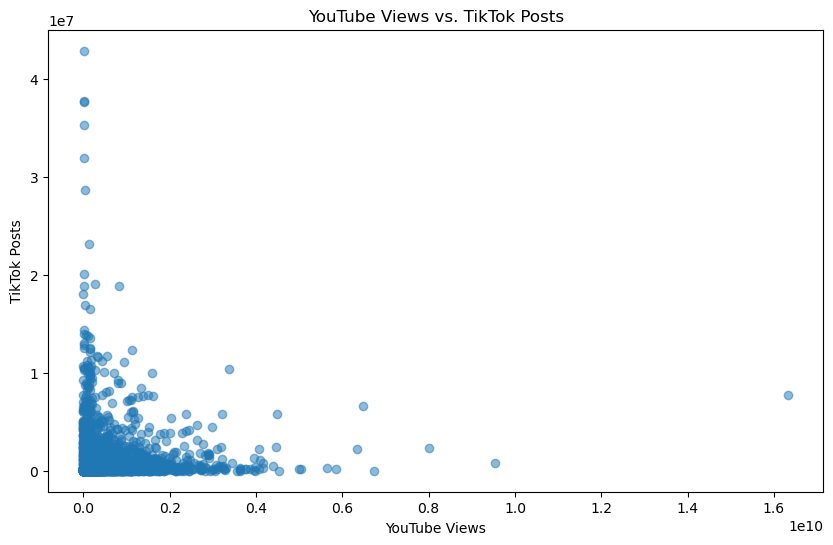

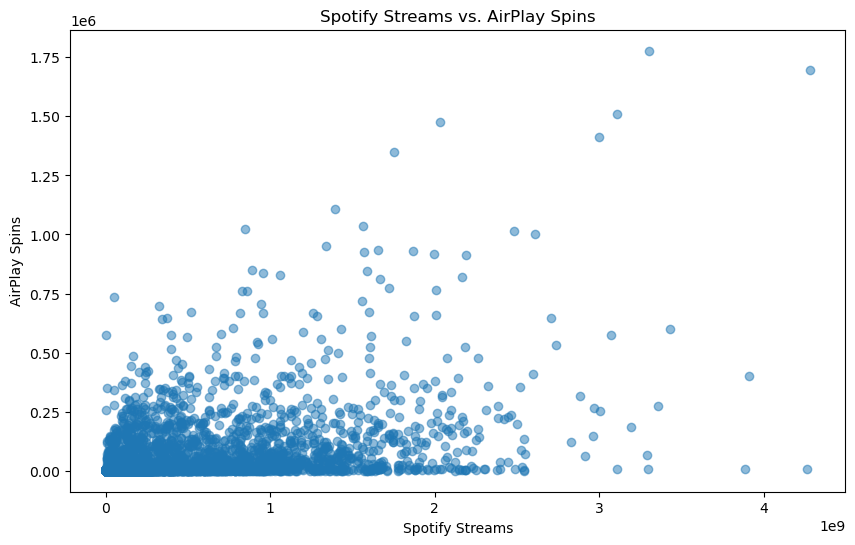

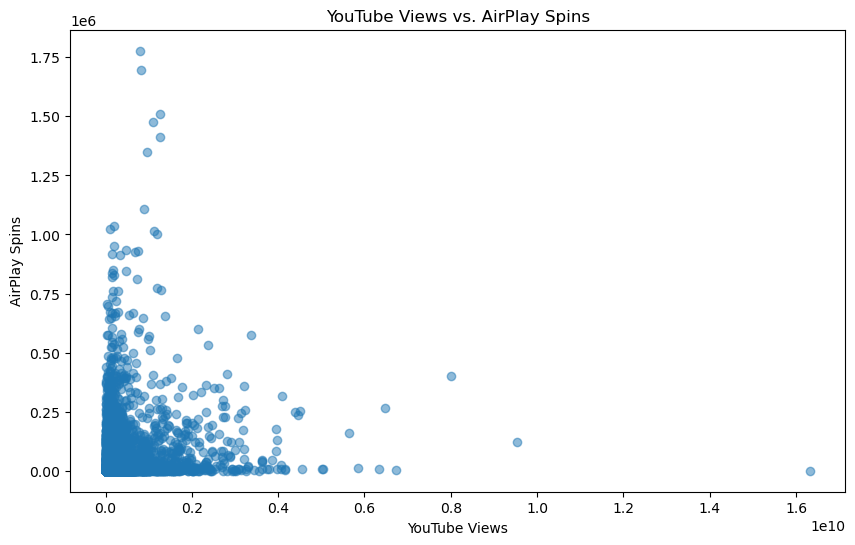

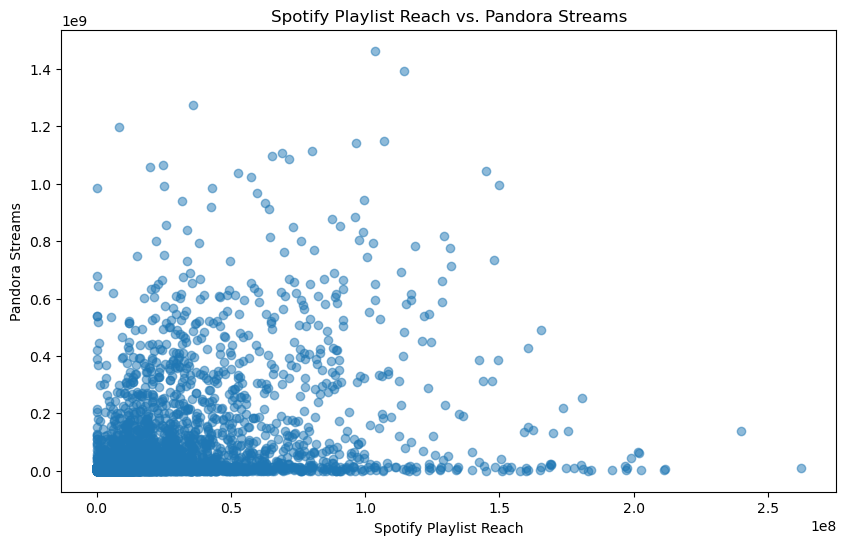

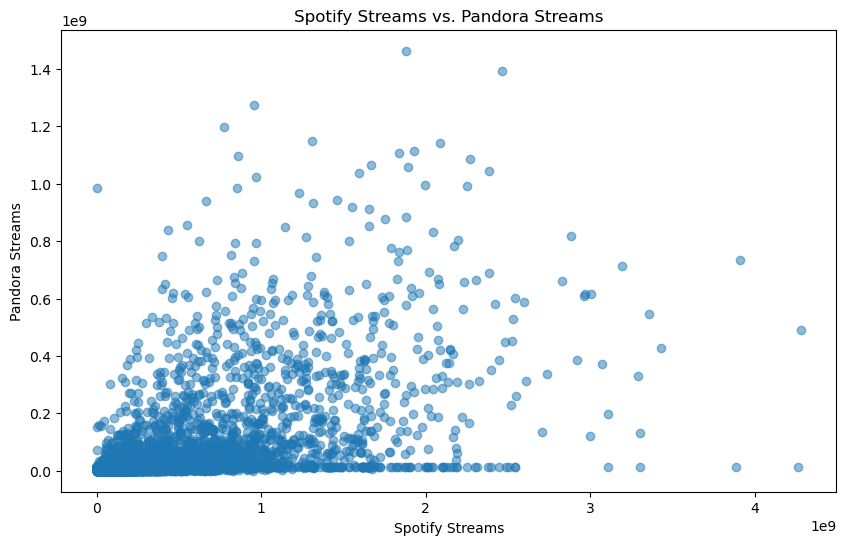

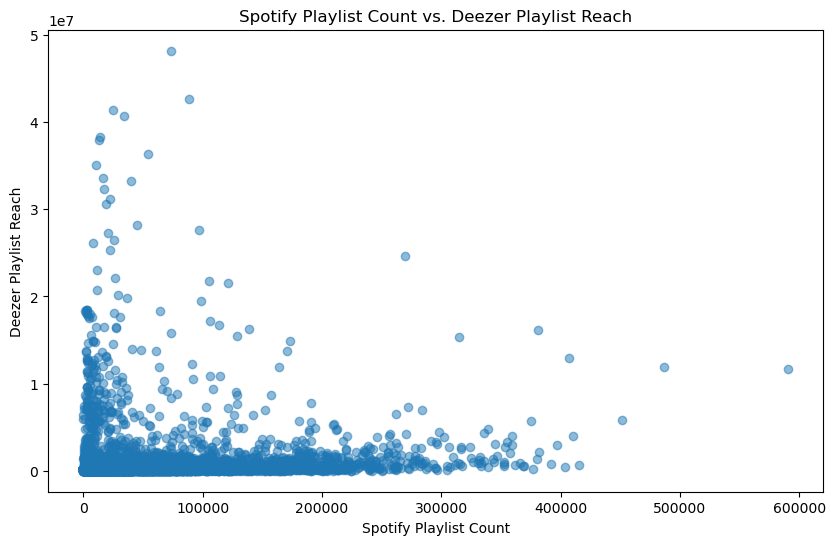

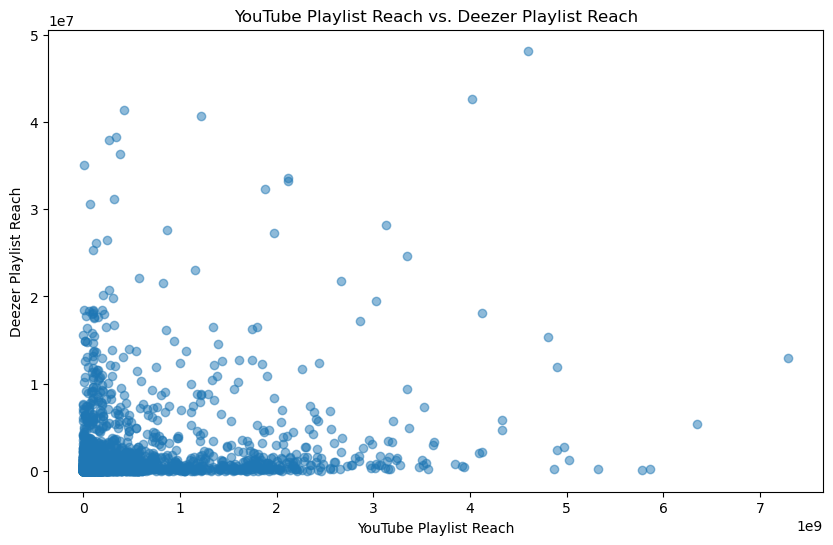

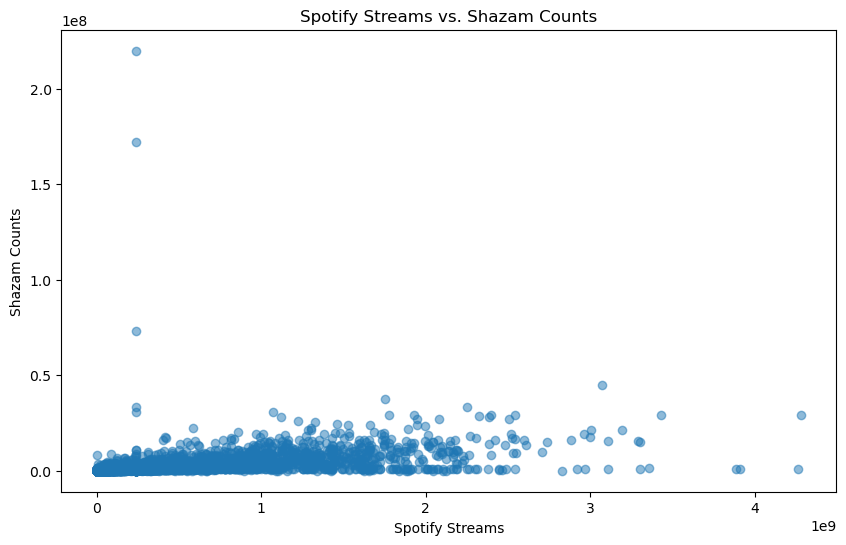

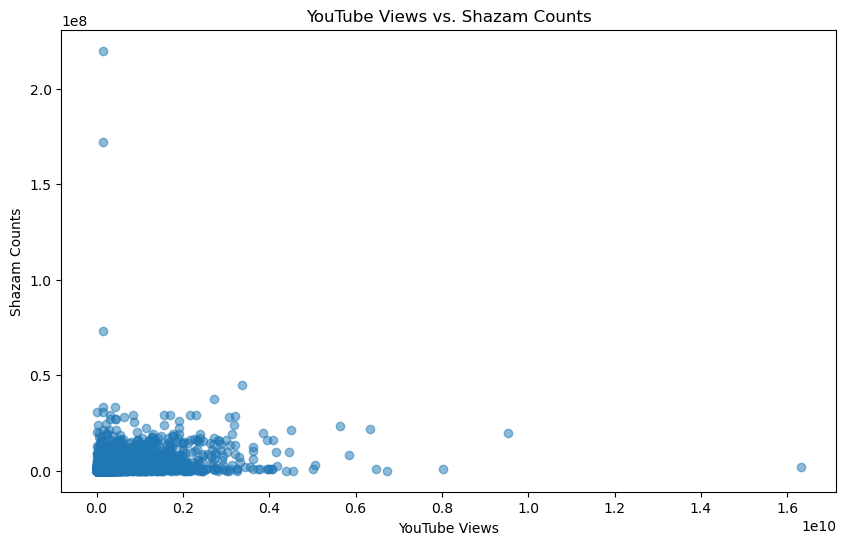

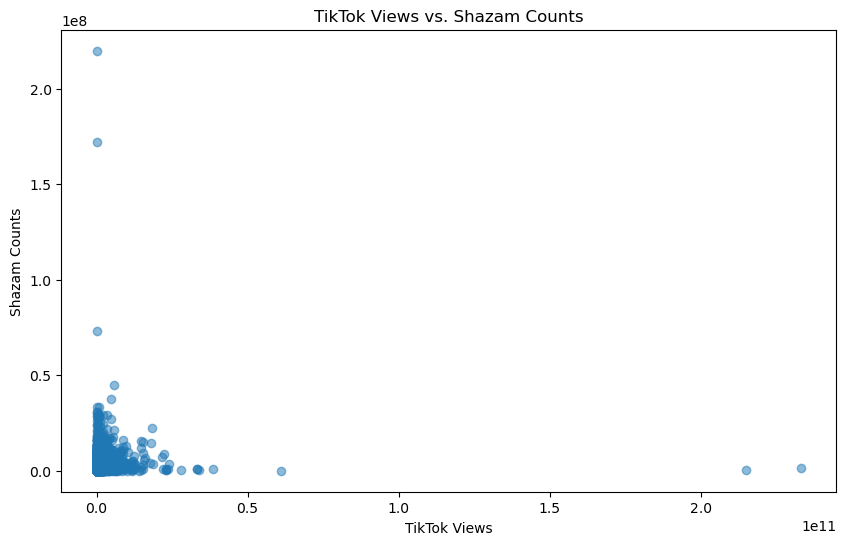

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC  All Time Rank  Track Score  Spotify Streams  \
0   2024-04-26  QM24S2402528              1        725.4     3.904709e+08   
1   2024-05-04  USUG12400910              2        545.9     3.237039e+08   
2   2024-03-19  QZJ842400387              3        538.4     6.013093e+08   
3   2023-01-12  USSM12209777              4        444.9     2.031281e+09   
4   2024-05-31  USUG12403398              5        423.3     1.070349e+08   

   Spotify Playlist Count  Spotify Playlist Reach  ...  AirPla

In [81]:
# Define a function to plot and show the relationship
def plot_relation(x_feature, y_feature, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_feature], df[y_feature], alpha=0.5)
    plt.title(f'{x_label} vs. {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Unique and interconnected relationships
relations = [
    ('Spotify Streams', 'YouTube Views', 'Spotify Streams', 'YouTube Views'),
    ('Spotify Playlist Reach', 'TikTok Views', 'Spotify Playlist Reach', 'TikTok Views'),
    ('Spotify Streams', 'YouTube Likes', 'Spotify Streams', 'YouTube Likes'),
    ('Spotify Streams', 'TikTok Likes', 'Spotify Streams', 'TikTok Likes'),
    ('YouTube Views', 'TikTok Views', 'YouTube Views', 'TikTok Views'),
    ('YouTube Views', 'TikTok Posts', 'YouTube Views', 'TikTok Posts'),
    ('Spotify Streams', 'AirPlay Spins', 'Spotify Streams', 'AirPlay Spins'),
    ('YouTube Views', 'AirPlay Spins', 'YouTube Views', 'AirPlay Spins'),
    ('Spotify Playlist Reach', 'Pandora Streams', 'Spotify Playlist Reach', 'Pandora Streams'),
    ('Spotify Streams', 'Pandora Streams', 'Spotify Streams', 'Pandora Streams'),
    ('Spotify Playlist Count', 'Deezer Playlist Reach', 'Spotify Playlist Count', 'Deezer Playlist Reach'),
    ('YouTube Playlist Reach', 'Deezer Playlist Reach', 'YouTube Playlist Reach', 'Deezer Playlist Reach'),
    ('Spotify Streams', 'Shazam Counts', 'Spotify Streams', 'Shazam Counts'),
    ('YouTube Views', 'Shazam Counts', 'YouTube Views', 'Shazam Counts'),
    ('TikTok Views', 'Shazam Counts', 'TikTok Views', 'Shazam Counts')
]

# Plot all relationships
for x_feature, y_feature, x_label, y_label in relations:
    plot_relation(x_feature, y_feature, x_label, y_label)

# Display the first few rows of the modified dataframe
print(df.head())